
You have been provided with data on mortality in Kenya. This data can be useful in informing products for life insurance products. There are several analysis that can be conducted to enable  make better decisions for creating and marketing of life insurance products. These analyses will form part of your interview.

Tasks
(1). Create a Kaplan-meier survival curve using one of the following variables; gender, colour, fundraising, spouse alive, spouse gender. Explain the difference/significance of the result. 

(2). Predict deaths that are likely to need fundraising. Use algorithm of your own choice. Include the confusion matrix, F1 score, sensitivity, and specificity.

The tasks should be undertaken in R or Python. Create a GitHub repo to push the code used in the interview tasks. All explanations and graphs should go into the README file. After completion of task, send back the link of repo. If you have any clarification question feel free to email back. The deadline for submitting the task is 22nd December at 5:00 pm - you can send back earlier if you are done 

In [84]:
import pandas as pd
import numpy as np
import re

import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [85]:
data_df = pd.read_csv('Obituaries_Dataset.csv')
data_df.head(2)
#data_df = data_df.dropna()

,Name,Announcement,Death,Burial,Burial_Day,Burial_Week,Gender,Age,Color,Size,...,Morgue,Same_Morgue,Cost_Morgue,Occupation,Repetition,Corporate,Corporate_Name,Residence,Residence_Name,Residence_Category
0,Eng. Paul Chemweno,11/8/2017,11/2/2017,11/17/2017,Friday,Weekday,Male,66.0,Yes,55.18,...,MTRH Eldoret,No,NaN,Director,NaN,NaN,NaN,NaN,NaN,NaN
1,Edith Kiende Kiogora,11/8/2017,10/27/2017,11/11/2017,Saturday,Weekend,Female,43.0,Yes,83.60,...,Chogoria Hospital Mortuary,No,NaN,Teacher,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
data_df.shape

(1291, 39)

In [87]:
data_df.columns

Index(['Name', 'Announcement', 'Death', 'Burial', 'Burial_Day', 'Burial_Week',
       'Gender', 'Age', 'Color', 'Size', 'Word_Count', 'No_of_Children',
       'Significant_Children', 'Significant_Relatives', 'Fundraising',
       'Death_to_Announce', 'Death_to_Burial', 'Announce_to_Burial',
       'No_of_Relatives', 'County_Burial', 'County_Death', 'County_Morgue',
       'Distance_Death', 'Distance_Morgue', 'Cause_of_Death', 'Married',
       'Spouse_Alive', 'Spouse_gender', 'Hospital', 'Morgue', 'Same_Morgue',
       'Cost_Morgue', 'Occupation', 'Repetition', 'Corporate',
       'Corporate_Name', 'Residence', 'Residence_Name', 'Residence_Category'],
      dtype='object')

In [88]:
data_df.describe()


,Age,Size,No_of_Children,Significant_Children,Significant_Relatives
count,507.000000,1237.000000,1093.000000,1092.000000,1083.000000
mean,65.422091,88.341496,5.484904,1.011905,7.337950
std,20.492632,55.520239,4.319116,1.848240,12.351233
min,1.000000,53.430000,0.000000,0.000000,0.000000
25%,51.000000,56.070000,3.000000,0.000000,0.000000
50%,68.000000,68.640000,4.000000,0.000000,2.000000
75%,81.500000,104.680000,8.000000,2.000000,8.000000
max,117.000000,880.000000,30.000000,12.000000,79.000000


## Lets go through the features of the data and understand them 

Death_to_Announce
Death_to_Burial
Announce_to_Burial

### Categorical 

In [89]:
data_df.Residence.unique()

array([nan, 'No', 'Yes', 'None', 'yes'], dtype=object)

There is a case problem with data entry for the Residence column which we will need to handle during data cleaning

In [90]:
data_df.Residence_Category.unique()

array([nan, 'None', 'Middle', 'Rural', 'Low', 'High'], dtype=object)

In [91]:
data_df.Burial_Day.unique()

array(['Friday', 'Saturday', 'Wednesday', 'Thursday', 'Tuesday', 'Monday',
       nan, 'Sunday', 'saturday'], dtype=object)

In [92]:
data_df.Burial_Week.unique()

array(['Weekday', 'Weekend', 'Weekeday', nan, 'weekend', 'weekday',
       'Weeekday'], dtype=object)

There is a case and spelling problem with data entry for the week day column which we will need to handle during data cleaning

In [93]:
data_df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [94]:
data_df.Married.unique()

array(['Yes', nan, 'No', 'yes', 'no'], dtype=object)

There is a case problem with data entry for the married column which we will need to handle during data cleaning

In [95]:
data_df.Spouse_Alive.unique()

array(['Yes', 'No', nan, 'None'], dtype=object)

In [96]:
data_df.Same_Morgue.unique()

array(['No', nan, 'Yes', 'no', 'yes', 'YES',
       'Nyahururu Referral Mortuary', 'Montezuma Fun eral Home', 'uYes'],
      dtype=object)

There is a case problem with data entry for the Same_Morgue column which we will need to handle during data cleaning

In [97]:
data_df.Color.unique()

array(['Yes', 'No', 'yes', 'no', nan], dtype=object)

There is a case problem with data entry for the Color column which we will need to handle during data cleaning

In [98]:
data_df.County_Death.unique()

array(['Uasin Gishu', 'Nairobi', 'Nyandarua', nan, 'Abroad', 'Embu',
       'Nyeri', 'Migori', "Murang'a", 'Nyahururu', 'Nakuru', 'Homa Bay',
       'Kiambu', 'Laikipia', 'Kisumu', 'Kisii', 'Machakos', 'Makueni',
       'Mombasa', 'Kajiado', 'Garissa', 'Tana River', 'Siaya', 'Kakamega',
       'Nyamira', 'Kitui', 'Trans Nzioa', 'Kericho', 'Kirinyaga', 'Meru',
       'Naivasha', 'Narok', 'Vihiga', 'Bungoma', 'Isiolo', 'Bomet',
       'Baringo'], dtype=object)

In [99]:
data_df.County_Burial.unique()

array(['Uasin Gishu', 'Tharaka Nithi', 'Nyandarua', 'Trans Nzioa',
       'Machakos', 'Meru', 'Nyamira', 'Nairobi', 'Bungoma', 'Bomet',
       'Nyeri', 'Kisumu', "Murang'a", 'Embu', 'Kajiado', 'Kiambu',
       'Tana River', 'Kakamega', 'Nakuru', 'Homa Bay', 'Busia', 'Migori',
       'Taita Taveta', 'Vihiga', 'Kisii', 'Makueni', nan, 'Kirinyaga',
       'Laikipia', 'Siaya', 'Baringo', 'Kitui', 'Kilifi', 'Nandi',
       'Kericho', 'Elgeyo Marakwet', 'Narok', 'Abroad', 'Mombasa',
       'kakamega', 'siaya', 'Isiolo'], dtype=object)

In [100]:
data_df.County_Morgue.unique()

array(['Uasin Gishu', 'Tharaka Nithi', 'Nakuru', 'Trans Nzioa', nan,
       'Meru', 'Nairobi', 'Nyeri', 'Embu', 'Shalom Hospital', 'Nyandarua',
       'Kiambu', 'Mombasa', 'Kenyatta University', 'Migori', 'Nyeri ',
       "Murang'a", 'Laikipia', 'Machakos', 'Kisii', 'Kakamega', 'Kilifi',
       'Kisumu', 'Kirinyaga', 'Homa Bay', 'Kajiado', 'Kericho', 'Vihiga',
       'Kitui', 'Baringo', 'Narok', 'Tana River', 'Bungoma', 'Homabay',
       'Nyamira', 'Suba', 'Siaya', 'Bomet', 'Busia', 'Transzoia',
       'Muranga', 'Makueni', 'Nyahururu', 'Uasin gishu', 'Kensington',
       'UK', 'Tharaka nithi', 'Nandi', 'meru', 'vihiga', 'Isiolo',
       'Abroad', 'KIambu'], dtype=object)

In [101]:
data_df.Cause_of_Death.unique()

array(['illness', 'accident', nan, 'Accident', 'Illness', 'ilness',
       'road accident', 'cancer', 'heart failure', 'fire accident'],
      dtype=object)

In [102]:
data_df.Corporate.unique()

array([nan, 'No', 'Yes', 'Ministry'], dtype=object)

### Numeric 
Age <br>
Size <br>
Significant_Children<br>
No_of_Children<br>
Significant_Relatives<br>
Death_to_Burial<br>
Death_to_Announce<br>
Announce_to_Burial<br>
No_of_Relatives<br>
No_of_Relatives<br>

### Text Variable 
Name<br>
Morgue<br>
Occupation<br>
Corporate_Name<br>

### Date
Announcement<br>
Death<br>
Burial

# Data cleaning


### 1. Missing data

###### Perctange of missing data for each feature

In [103]:
def get_NaN_percent(data_df):
    """
    get the percenatge of NaN fields in the features
    
    data_df: dataframe
    """
    total = data_df.isnull().sum().sort_values(ascending = False)
    percent = round(data_df.isnull().sum().sort_values(ascending = False)/len(data_df)*100, 2)
    NaN_percent=pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent'])
    return NaN_percent

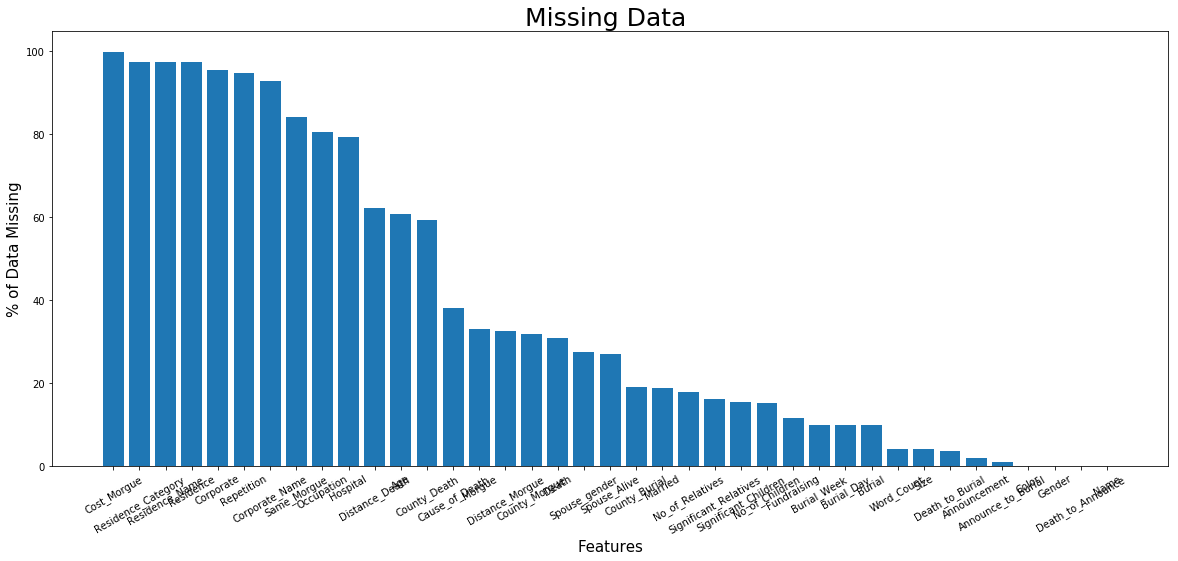

In [104]:
NaN_percent =  get_NaN_percent(data_df)
NaN_percent
plott = NaN_percent[['Percent']]

index_ = np.arange(len(plott))
plt.figure(figsize=(20,8))
plt.bar(index_, plott.Percent)

plt.xlabel('Features', fontsize=15)
plt.ylabel('% of Data Missing', fontsize=15)
plt.xticks(index_, plott.index, fontsize=10, rotation=30)
plt.title('Missing Data ', fontsize=25)
plt.show()

### Dropping features with more than 20% NaNs
We have alot of missing NaNs in the data, the first attempt to cleaning this data is dropping all the features with more than 60% NaNs


In [105]:
Dropped=NaN_percent[NaN_percent['Percent']>20]
column=Dropped.index
column=list(column)



In [106]:
clean_data_df=data_df.drop(column, axis=1)


In [107]:
clean_NaN_percent =  get_NaN_percent(clean_data_df)
clean_NaN_percent

,Total,Percent
County_Burial,247,19.13
Married,243,18.82
No_of_Relatives,230,17.82
Significant_Relatives,208,16.11
Significant_Children,199,15.41
No_of_Children,198,15.34
Fundraising,149,11.54
Burial_Week,128,9.91
Burial_Day,128,9.91
Burial,127,9.84


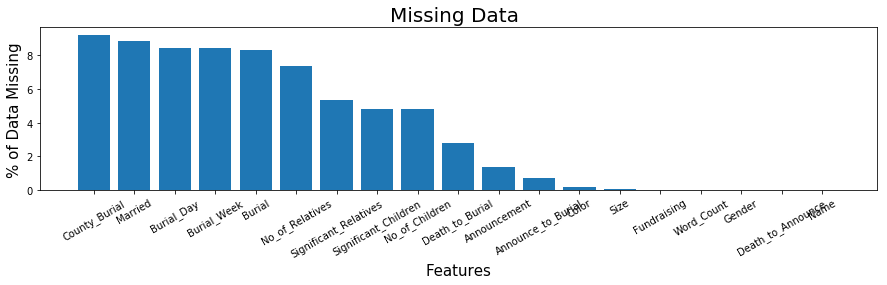

In [108]:
clean_data_df=clean_data_df.dropna(subset=['Fundraising'])

clean_NaN_percent =  get_NaN_percent(clean_data_df)
clean_NaN_percent
plott = clean_NaN_percent[['Percent']]

index_ = np.arange(len(plott))
plt.figure(figsize=(15,3))
plt.bar(index_, plott.Percent)

plt.xlabel('Features', fontsize=15)
plt.ylabel('% of Data Missing', fontsize=15)
plt.xticks(index_, plott.index, fontsize=10, rotation=30)
plt.title('Missing Data ', fontsize=20)
plt.show()

In [109]:
plott 

,Percent
County_Burial,9.19
Married,8.84
Burial_Day,8.41
Burial_Week,8.41
Burial,8.32
No_of_Relatives,7.36
Significant_Relatives,5.34
Significant_Children,4.82
No_of_Children,4.82
Death_to_Burial,2.80


In [110]:
len(clean_data_df)

1142

In [111]:
clean_data_df=clean_data_df.dropna()
print(clean_data_df.shape)
print(929/len(data_df)*100)


(929, 19)
71.95972114639814


In [113]:
#Fundraising
Fundraising= clean_data_df['Fundraising']
print(Fundraising.unique())
number = LabelEncoder()
clean_data_df['Fundraising'] = number.fit_transform(clean_data_df['Fundraising'].astype('str'))

['Yes' 'No']


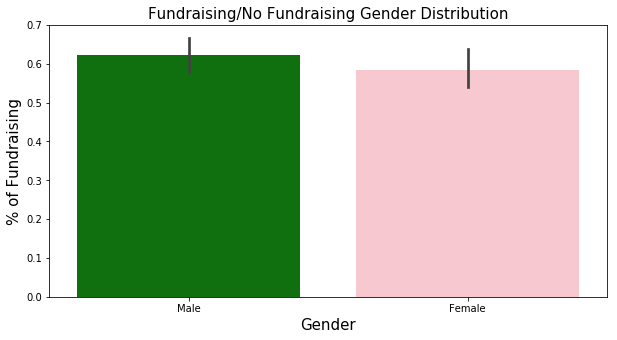

In [115]:
pal = {"Male":"green", "Female":"Pink"}
plt.subplots(figsize = (10,5))
ax = sns.barplot(x = "Gender", 
            y = "Fundraising", 
            data=clean_data_df, 
            palette = pal,
            linewidth=2 )
plt.title("Fundraising/No Fundraising Gender Distribution", fontsize = 15)
plt.ylabel("% of Fundraising", fontsize = 15)
plt.xlabel("Gender",fontsize = 15);
plt.show()

After dropping all the NaN values, we are left with <b>929</b> data points out off the <b>1291</b>, this is around <b>72%</b>

### 2. Handling Categorical variables

Most of the features are of categorical type stored as text values. We need to convert these to numericals to b used for modeling.<br>
These features are:<br>
1. County of Burial<br>
2. Married<br>
3. Gender<br>
4. Color<br>
5. Fundraising<br>
6. Burial week<br>
7. Burial Day<br>






In [28]:
data_df_cleaned = clean_data_df
# County of Burial 
county_of_burial= clean_data_df['County_Burial']


# Duplicates for Siaya and kakamega
county_of_burial.replace('siaya', 'Siaya', inplace=True)
county_of_burial.replace('kakamega', 'Kakamega',inplace=True)

print(len(county_of_burial.unique()))
print(county_of_burial.unique())

number = LabelEncoder()
data_df_cleaned['County_Burial'] = number.fit_transform(clean_data_df['County_Burial'].astype('str'))

39
['Uasin Gishu' 'Tharaka Nithi' 'Nyandarua' 'Trans Nzioa' 'Meru' 'Nyamira'
 'Nairobi' 'Bungoma' 'Bomet' 'Kisumu' "Murang'a" 'Embu' 'Kajiado'
 'Tana River' 'Kakamega' 'Nyeri' 'Kiambu' 'Homa Bay' 'Busia' 'Migori'
 'Taita Taveta' 'Vihiga' 'Kisii' 'Makueni' 'Siaya' 'Baringo' 'Machakos'
 'Kitui' 'Kilifi' 'Nakuru' 'Nandi' 'Kirinyaga' 'Kericho' 'Elgeyo Marakwet'
 'Laikipia' 'Narok' 'Abroad' 'Mombasa' 'Isiolo']


In [29]:
# Married 
Married= clean_data_df['Married']

Married.replace('yes', 'Yes', inplace=True)
Married.replace('no', 'No',inplace=True)
print(Married.unique())
number = LabelEncoder()
data_df_cleaned['Married'] = number.fit_transform(clean_data_df['Married'].astype('str'))


['Yes' 'No']


In [30]:
#Gender

Gender= clean_data_df['Gender']
print(Gender.unique())
Gender_= pd.Categorical(Gender).codes
data_df_cleaned['Gender']=Gender_


['Male' 'Female']


In [31]:
#Color 
Color= clean_data_df['Color']


Color.replace('yes', 'Yes', inplace=True)
Color.replace('no', 'No',inplace=True)
print(Color.unique())

number = LabelEncoder()
data_df_cleaned['Color'] = number.fit_transform(clean_data_df['Color'].astype('str'))


['Yes' 'No']


In [32]:
#Fundraising
Fundraising= clean_data_df['Fundraising']
print(Fundraising.unique())
number = LabelEncoder()
data_df_cleaned['Fundraising'] = number.fit_transform(clean_data_df['Fundraising'].astype('str'))

['Yes' 'No']


In [33]:
#Burial Week

Burial_Week= clean_data_df['Burial_Week']

Burial_Week.replace('Weeekday', 'Weekday', inplace=True)
Burial_Week.replace('weekday', 'Weekday',inplace=True)
Burial_Week.replace('weekend', 'Weekend',inplace=True)

print(Burial_Week.unique())
number = LabelEncoder()
data_df_cleaned['Burial_Week'] = number.fit_transform(clean_data_df['Burial_Week'].astype('str'))

['Weekday' 'Weekend']


In [34]:
# Burial_Day
clean_data_df['Burial_Day'].unique()

Burial_Day= clean_data_df['Burial_Day']

Burial_Day.replace('saturday', 'Saturday', inplace=True)

print(Burial_Day.unique())
number = LabelEncoder()
data_df_cleaned['Burial_Day'] = number.fit_transform(clean_data_df['Burial_Day'].astype('str'))

['Friday' 'Saturday' 'Wednesday' 'Thursday' 'Tuesday' 'Monday' 'Sunday']


### 3 Convert dates from strings to Datetime type

We have a couple date features which are in str type, I convert them to datetime type .<br>

These features are:<br>
1. Announcement<br>
2. Burial<br>


In [35]:
import datetime
def Convert_time(date):
    date_str = '29/12/2017' # The date - 29 Dec 2017
    format_str = '%m/%d/%Y' # The format
    datetime_obj = datetime.datetime.strptime(date, format_str)
    
    return datetime_obj

data_df_cleaned[data_df_cleaned['Announcement']=='`']

data_df_cleaned=data_df_cleaned.drop([995,726,734,743])

In [36]:


data_df_cleaned['Announcement'] = data_df_cleaned['Announcement'].apply(lambda date: Convert_time(date))
data_df_cleaned['Burial'] = data_df_cleaned['Burial'].apply(lambda date: Convert_time(date))

In [37]:
data_df_cleaned.head(2)

,Name,Announcement,Burial,Burial_Day,Burial_Week,Gender,Color,Size,Word_Count,No_of_Children,Significant_Children,Significant_Relatives,Fundraising,Death_to_Announce,Death_to_Burial,Announce_to_Burial,No_of_Relatives,County_Burial,Married
0,Eng. Paul Chemweno,2017-11-08 00:00:00,2017-11-17,0,0,1,1,55.18,179,7.0,0.0,0.0,1,6.00,15,9,35,37,1
1,Edith Kiende Kiogora,2017-11-08 00:00:00,2017-11-11,2,1,0,1,83.60,293,4.0,0.0,7.0,1,12.00,15,3,8,35,1


In [38]:

#clean_data_df['Significant_Children']


### 3 Cleaning the numeric data types

We have a couple numeric features which we want to make sure are in the correct format for any modeling .<br>

These features are:<br>
1. Size<br>
2. Word_Count<br>
3. Significant_Relatives<br>
4. Death_to_Announce<br>
5. Death_to_Burial<br>
6. Announce_to_Burial<br>
7. No_of_Relatives<br>

###### NB: Death_to_Announce and Death_to_Burial  has a very many incorrect inputs ie ''#VALUE!''..... so I will drop this column
        


In [39]:
#data_df_cleaned=data_df_cleaned.dropna(subset=['Death_to_Announce','Death_to_Burial'])
data_df_cleaned=data_df_cleaned.drop(['Death_to_Announce','Death_to_Burial'], axis=1)


In [40]:

# Size 
data_df_cleaned.Size.dtype

#word_count
data_df_cleaned.Word_Count.dtype
data_df_cleaned['Word_Count'] = data_df_cleaned['Word_Count'].apply(lambda text: re.sub(',(?!\s+\d$)', '', text))

data_df_cleaned['Word_Count'] = pd.to_numeric(data_df_cleaned.Word_Count)
data_df_cleaned.Word_Count.dtype

dtype('int64')

In [41]:
#Significant_Relatives
data_df_cleaned.Significant_Relatives.dtype

#No_of_Relatives

data_df_cleaned['No_of_Relatives'] = pd.to_numeric(data_df_cleaned.No_of_Relatives)

data_df_cleaned.No_of_Relatives.dtype

#Announce_to_Burial
data_df_cleaned['Announce_to_Burial'] = data_df_cleaned['Announce_to_Burial'].apply(lambda text: re.sub(',(?!\s+\d$)', '', text))

#data_df_cleaned['Announce_to_Burial'] = pd.to_numeric(data_df_cleaned.Announce_to_Burial)
data_df_cleaned[data_df_cleaned['Announce_to_Burial']=="#VALUE!"]

,Name,Announcement,Burial,Burial_Day,Burial_Week,Gender,Color,Size,Word_Count,No_of_Children,Significant_Children,Significant_Relatives,Fundraising,Announce_to_Burial,No_of_Relatives,County_Burial,Married


In [42]:


data_df_cleaned.reset_index(drop=True, inplace=True)
data_df_cleaned.shape

(925, 17)

In [43]:
#save to csv
data_df_cleaned.to_csv('cleaned_data.csv')



#### Assumptions
1. Anything in the Announce_to_Burial date of between of above 1000 and below 0 is treated as an outlier and dropped in the 
calculation of the survival curve
